### 3.2

3.2 (a) 

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# Unobservable component of supply shock z
# Can have any distribution one pleases
w = iid.beta(1,2,loc=-iid.beta(1,2).mean()) # Centered for convenience

# Structural parameters;
(alpha,beta) = (-1,2)     
sigma = {'u':1/2,'v':1/3}
mu = {'u':2,'v':-1}

# u,v assumed independent
u = iid.norm(loc=mu['u'], scale=sigma['u'])  # Demand shocks
v = iid.norm(loc=mu['v'], scale=sigma['v'])  # Supply shocks

# Reduced form coefficients
pi = [[-beta/(alpha - beta), -1/(alpha - beta)],
     [ alpha/(alpha - beta), 1/(alpha - beta)]]

# Generate N realizations of system
# Outcomes have columns (p,q,z)
def wright_dgp(N):
    """
    Generate data consistent with Wright (1934) hog demand and supply.

    Returns a pandas dataframe with N observations on (p,q,z), where
    z is understood to be a supply shock.
    """
    
    # Arrange shocks into an Nx2 matrix
    U = np.c_[u.rvs(N), v.rvs(N)]

    # Matrix product gives [q,p]; label by putting into df
    df = pd.DataFrame(U@pi,columns=['q','p'])

    Udf = pd.DataFrame(U,columns=['u','v']) # For future reference

    # Relate v and z (need not be linear)
    unobserved_shock = w.rvs(N)/10
    df['z'] = (1-unobserved_shock)*np.exp(4*Udf['v'] - unobserved_shock)
    df['Constant'] = 1

    # Include a constant term in both X & Z
    return df[['q']],df[['Constant','p']],df[['Constant','z']]

def draw_b(N,dgp):
    """
    Generate a random variate $b$ from a sample of $N$ draws from a function dgp.
    """
    y,X,Z =  dgp(N)

    return np.linalg.solve(Z.T@X,Z.T@y) # Solve normal eqs

b = draw_b(10000,wright_dgp)
#print(b)

def linear_dgp(N,beta,gamma,pi,sigma_u,sigma_v):
    u = iid.norm(scale=sigma_u).rvs(N)
    v = iid.norm(scale=sigma_v).rvs(N)
    Z = iid.norm().rvs(N)

    X = Z*pi + v
    y = X*beta + + Z*gamma + u

    df = pd.DataFrame({'y':y,'x':X,'z':Z,'Constant':1})

    return df[['y']],df[['Constant','x']],df[['Constant','z']]

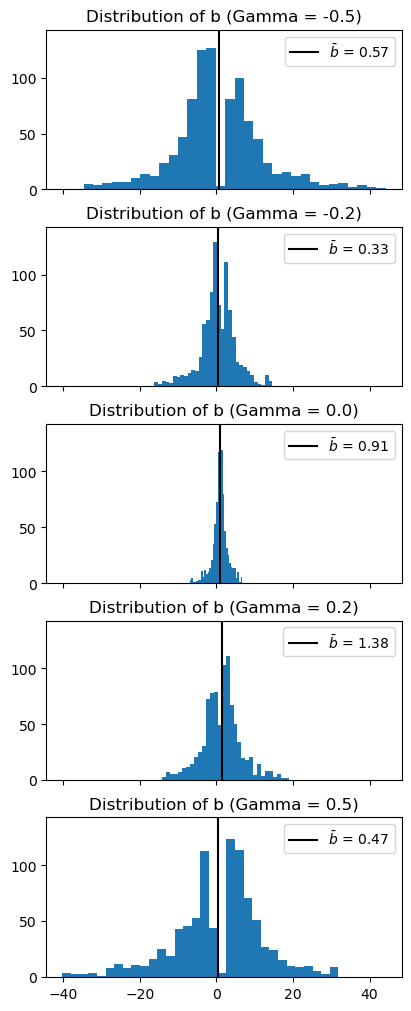

In [20]:
from matplotlib import pyplot as plt

B = []
gammas = np.array([-5,-2,0,2,5])/10 # np.array([-10,-5,-2,0,2,5,10])/10
fig, axs = plt.subplots(len(gammas),1, figsize=(4, 10), sharey=True, sharex=True, layout='constrained')
for i in range(len(gammas)):
    gamma = gammas[i]
    B = pd.DataFrame([draw_b(100,lambda N: linear_dgp(N,1,gamma,.01,1,1))[1] for i in range(1000)])
    # Truncate B to 5th and 95th percentiles
    B = B[(B >= np.percentile(B,5)) & (B <= np.percentile(B,95))]
    axs[i].hist(B, bins=int(np.ceil(np.sqrt(B.shape[0]))))
    axs[i].set_title("Distribution of b (Gamma = {})".format(gamma))
    axs[i].axvline(np.mean(B)[0],c='k',label=r'$\bar{b}$ = ' + f'{np.mean(B)[0]:.2f}')
    axs[i].legend()
plt.show()



3.2 (b)

In [ ]:
# TO BE FILLED IN -- BORA


3.2 (c)

In [ ]:
# TO BE FILLED IN -- BORA